## Problem Definition
> The primary objective of this project is to 
- Conduct a data analysis with a main objective evolving aroud tips in our resturant to find insights that help we optimize the procecss. 
- Develop a machine learning model that can predict the amount of tips that restaurant staff are likely to receive based on various input factors. 
- This prediction can help both restaurant owners and staff in improving their services and optimizing their earnings.

****

## Importing necessary libraries and needed dependencies.

In [1]:
# Importing necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.linear_model import LinearRegression
import shutil

## Data Collection

In [2]:
#Creating a .CSV file for pandas data operatoins
input_file = "tips.txt"
output_file = "tip.csv"

shutil.copyfile(input_file,output_file)

'tip.csv'

In [3]:
#Loading data into a dataframe
data = pd.read_csv("tip.csv")

*******

# Data Preprocessing

Ensuring the adequacy of our data thorough:

- Identification and handling of null values within the dataset.
- Detection and management of existing outliers.

## Missing Data 
The importance of adressing missing data lies in it's ability to affect the generalizability of the results.

We navigate through this process by asking two guiding questions:

1. Are the missing data scattered randomly throughout the observations or are distinct patterns identifiable?   
2. How prevalent is the missing data? 

In [4]:
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Fortunately, our data is preprocessed already O_O.

## Outliers

 **Outliers** Are Extreme values that abnormally different or far away from our dataset.

Outliers cannot be categorically characterized as either beneficial or problematic, but instead must be viewed within the context of the analysis and should be evaluated by the type of information they may provide. 


|Action|Pros|Cons|
|---|---|---|
|Keep outliers|Can learn more about the behavior of extreme cases|Can introduce bias into your model|
|Remove outliers|Can build a more accurate model for predicting typical behavior|May lose valuable information about extreme cases|


As long as we are interested in understanding the behaviour of our max tippers we can proceed without deleting the outliers in the phase of data analysis to understand the behavior of the maximum tippers and handle them in the feature engineering phase before the model to make the advantages of both approaches.

This is a valid approach as it allow us to gain valuable insights into the behavior of extreme tippers while also ensuring that your model is not overly influenced by them.

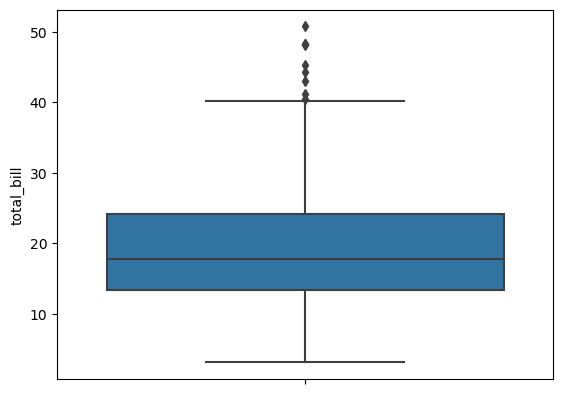

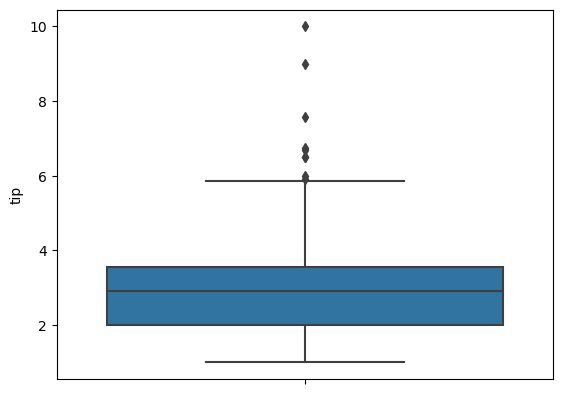

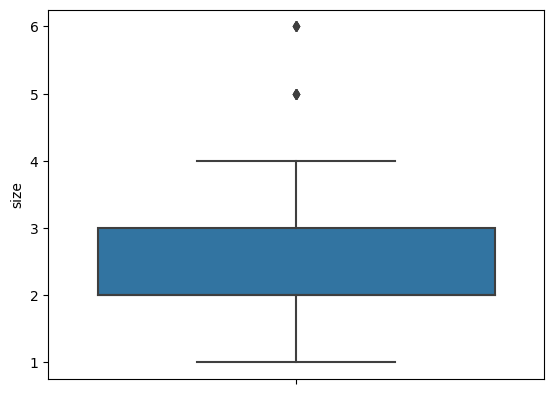

In [38]:
for column in data.columns:
     if data[column].dtype != "object":
        sns.boxplot(data =data, y=column)
        plt.show()

*******

# Exploratory Data Analysis

In [5]:
#desplaying the first 10 rows of dataset to get an overview of it's structure and content
data.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [6]:
# Providing summary information about the dataset's structure, including data types, non-null counts, data types and memory usage.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


### Univariate analysis of our categorical features.

In [7]:
# # Assign the column names of the dataset 
columns = data.columns
# Creating a list to store names of the numerical columns
numerical = [col for col in columns if data[col].dtype != "object"]
# Creating a list to store names of the categorical columns
categorical = [col for col in columns if data[col].dtype =="object"]

In [8]:
# Categorical variables
categorical

['sex', 'smoker', 'day', 'time']

##### Data inspecttion using available documentation to gain a deeper understanding of the features.

- sex: gender of the person paying the bill
- smoker: whether the person smoked or not
- day: day of the week
- time: lunch or dinner


In [9]:
# Loading our data into a data frame then displaying the first few rows to get an overview of it's structure and content. 
data_categorical = data[categorical]
data_categorical.head(10)

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner
5,Male,No,Sun,Dinner
6,Male,No,Sun,Dinner
7,Male,No,Sun,Dinner
8,Male,No,Sun,Dinner
9,Male,No,Sun,Dinner


In [10]:
# checking the frequency table and measure of center
# List comperhension to create the summaries
summaries= [{
    "column" :col,
    "frequency_table" : data[col].value_counts().to_dict(),
    "mode" : data[col].value_counts().idxmax()
} for col in categorical]

# Creating the summary data frame
summary_df = pd.DataFrame(summaries)


# Displaying the summary data frame
display(summary_df)


,column,frequency_table,mode
0,sex,"{'Male': 157, 'Female': 87}",Male
1,smoker,"{'No': 151, 'Yes': 93}",No
2,day,"{'Sat': 87, 'Sun': 76, 'Thur': 62, 'Fri': 19}",Sat
3,time,"{'Dinner': 176, 'Lunch': 68}",Dinner


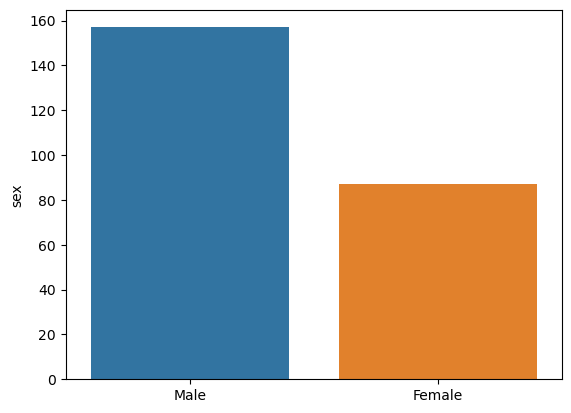

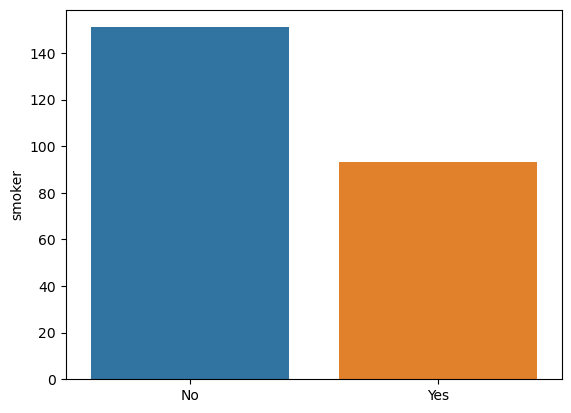

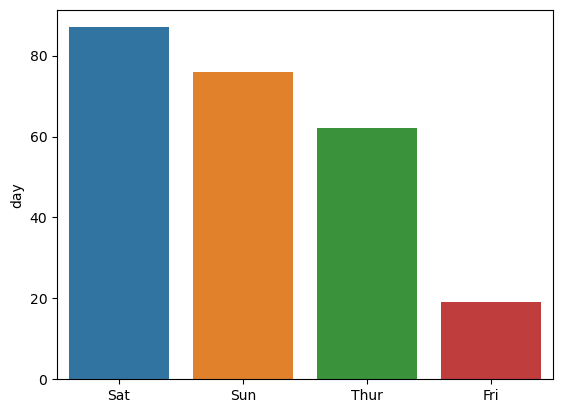

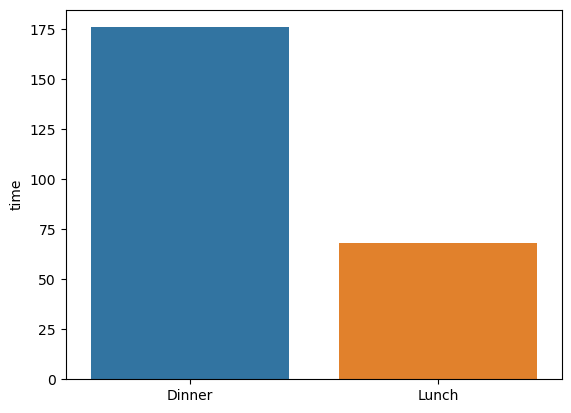

In [11]:
# Exploring the distribution of the categorical data.
for col in categorical:
    sns.barplot(data=data, x=data[col].value_counts().index,y=data[col].value_counts())
    plt.show()

### For initial univariate exploration of the categorical data at hand we found out.
#### On the assumption that our data set is representative of the whole population.
1. Numper of male customers of the resturant is much away bigger than the numper of female customers.
2. Numper of non-smoker customers far exceeds the number of smoker customers.
3. Each Saturday, Sunday, and Thursday we witness many more customers than Friday Knowing that Monday, Tuesday, and Wednesday are all missing.
4. Customers mainly prefer to come for dinner than having lunch at our restaurant by far. 

### Univariate Analysis of our numerical features.

In [12]:
# Reviewing our numerical features we stored earlier.
numerical

['total_bill', 'tip', 'size']

##### Data inspecttion using available documentation to gain a deeper understanding of the features.
- *total_bill*: Total bill in dollars including taxes.
- *tip*: Tip given to waiters in dollars.
- *size*: number of people in a table 

In [13]:
# Loading our data into a data frame then displaying the first few rows to get an overview of it's structure and content. 
data_numerical = data[numerical]
data_numerical.head(10)

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
5,25.29,4.71,4
6,8.77,2.00,2
7,26.88,3.12,4
8,15.04,1.96,2
9,14.78,3.23,2


In [14]:
# providing a overview of summary descriptive stats about the Numerical data
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


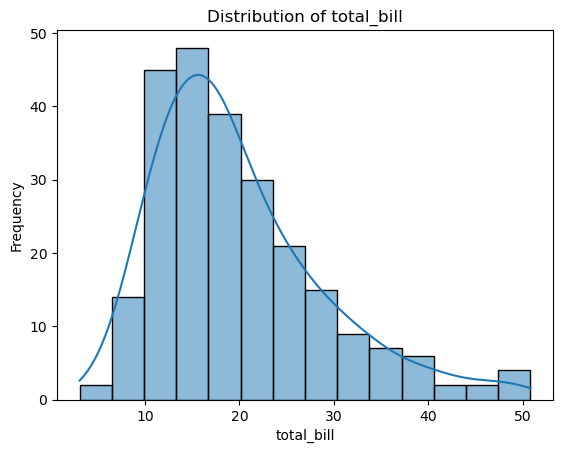

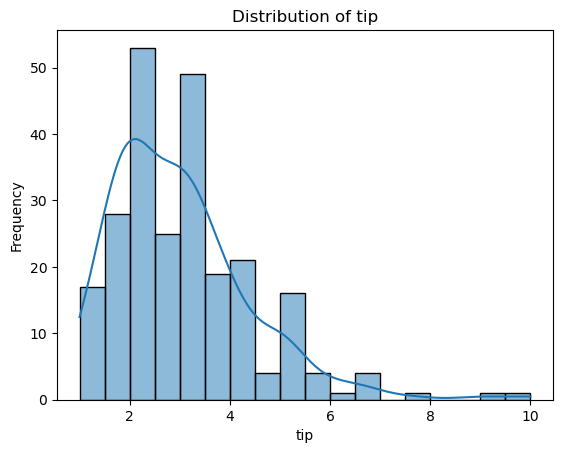

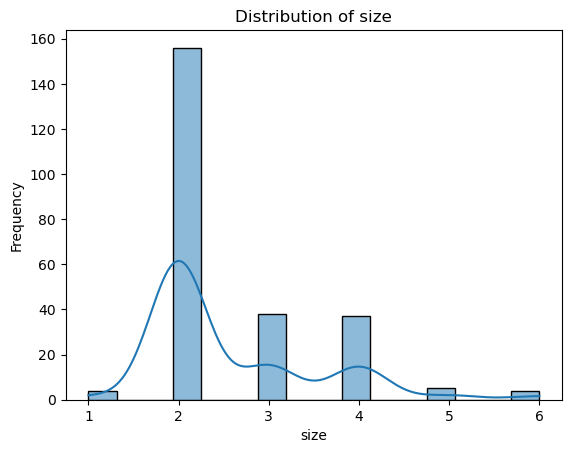

In [15]:
# Examining the distribution of the numerical features
for col in numerical:
    sns.histplot(data= data_numerical, x=col ,kde= True)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {col}")
    plt.show()

#### Observing the distribution of our numerical features we can say:
1. The right skewed distibution os the total_bill indicates a wider customer base with some high-priced products OR it just the numper of customer in the same table "bill" ==> We will see.
2. The right skewness of the tip recived from customers can be considered in the resturant tip pooling policies as the right skew means a few servers will benefit greatly while most gain modest pools. 
3. The disribution of numper of customer in teh same table with the majority  around 2 custumers per table inndicates that our prior assumption about the wider customer base is actully appeals to be more and more true.

##### Examining the central tendencies and variability within our numerical features

In [16]:
# Examining the central tendencies and variation within our numerical features
data.describe()


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


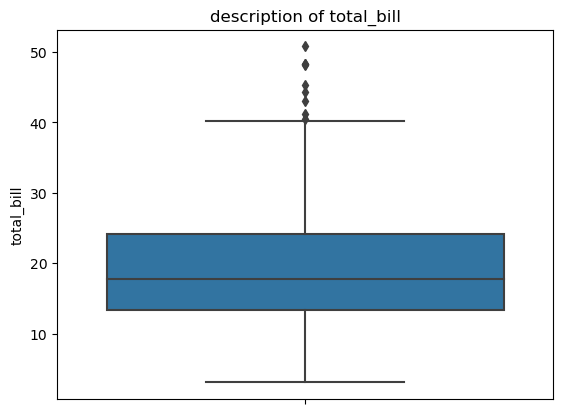

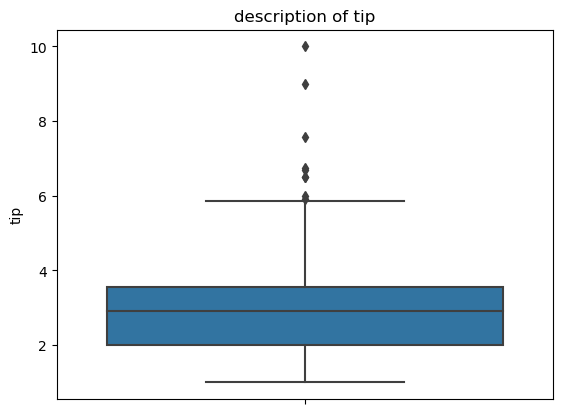

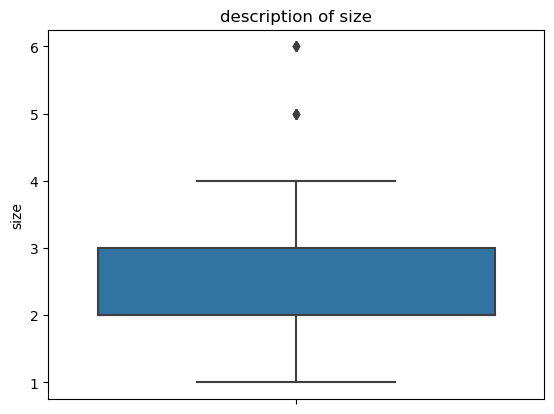

In [17]:
for col in numerical:
    sns.boxplot(data= data[numerical] ,y =col)
    plt.title(f"description of {col}")
    plt.show()

### Bivariate & Multivariate analysis of our features.

In [18]:
# Creating a gender balanced data
gender = data.groupby("sex")
balanced_data = gender.apply(lambda x: x.sample(gender.size().min()).reset_index(drop =True))
female = balanced_data[balanced_data["sex"] == "Female"]
male = balanced_data[balanced_data["sex"] == "Male"]


In [19]:

female.describe()

,total_bill,tip,size
count,87.000000,87.000000,87.000000
mean,18.056897,2.833448,2.459770
std,8.009209,1.159495,0.937644
min,3.070000,1.000000,1.000000
25%,12.750000,2.000000,2.000000
50%,16.400000,2.750000,2.000000
75%,21.520000,3.500000,3.000000
max,44.300000,6.500000,6.000000


In [20]:

male.describe()

,total_bill,tip,size
count,87.000000,87.000000,87.000000
mean,20.020575,2.959885,2.517241
std,9.028977,1.410593,0.860801
min,7.510000,1.000000,1.000000
25%,13.325000,2.000000,2.000000
50%,18.290000,2.710000,2.000000
75%,23.845000,3.735000,3.000000
max,48.330000,9.000000,5.000000


In [21]:
day_time =  data.groupby(["day","sex"])["time"].value_counts()
day_time

day   sex     time  
Fri   Female  Dinner     5
              Lunch      4
      Male    Dinner     7
              Lunch      3
Sat   Female  Dinner    28
      Male    Dinner    59
Sun   Female  Dinner    18
      Male    Dinner    58
Thur  Female  Lunch     31
              Dinner     1
      Male    Lunch     30
Name: time, dtype: int64

In [22]:
tip_time = data.groupby("time")["tip"].describe()
tip_time

,count,mean,std,min,25%,50%,75%,max
time,,,,,,,,
Dinner,176.0,3.102670,1.436243,1.00,2.0,3.00,3.6875,10.0
Lunch,68.0,2.728088,1.205345,1.25,2.0,2.25,3.2875,6.7


In [23]:
restaurant_companions = balanced_data.groupby(["size","time"])["sex"].value_counts()
restaurant_companions 

size  time    sex   
1     Dinner  Female     2
      Lunch   Female     1
              Male       1
2     Dinner  Male      41
              Female    32
      Lunch   Female    26
              Male      17
3     Dinner  Female    11
              Male      11
      Lunch   Female     3
              Male       1
4     Dinner  Male      13
              Female     6
      Lunch   Female     3
              Male       1
5     Dinner  Female     1
              Male       1
      Lunch   Male       1
6     Lunch   Female     2
Name: sex, dtype: int64

In [24]:
# Showing how each categorical features affects the tip amount
for col in categorical:
    status = data.groupby(col)["tip"].describe()
    display(status)

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,87.0,2.833448,1.159495,1.0,2.0,2.75,3.50,6.5
Male,157.0,3.089618,1.489102,1.0,2.0,3.00,3.76,10.0


,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,2.991854,1.377190,1.0,2.0,2.74,3.505,9.0
Yes,93.0,3.008710,1.401468,1.0,2.0,3.00,3.680,10.0


,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
Fri,19.0,2.734737,1.019577,1.00,1.9600,3.000,3.3650,4.73
Sat,87.0,2.993103,1.631014,1.00,2.0000,2.750,3.3700,10.00
Sun,76.0,3.255132,1.234880,1.01,2.0375,3.150,4.0000,6.50
Thur,62.0,2.771452,1.240223,1.25,2.0000,2.305,3.3625,6.70


,count,mean,std,min,25%,50%,75%,max
time,,,,,,,,
Dinner,176.0,3.102670,1.436243,1.00,2.0,3.00,3.6875,10.0
Lunch,68.0,2.728088,1.205345,1.25,2.0,2.25,3.2875,6.7


In [25]:
cross_tab = pd.crosstab(data['sex'], data['smoker'])

print(cross_tab)

smoker  No  Yes
sex            
Female  54   33
Male    97   60


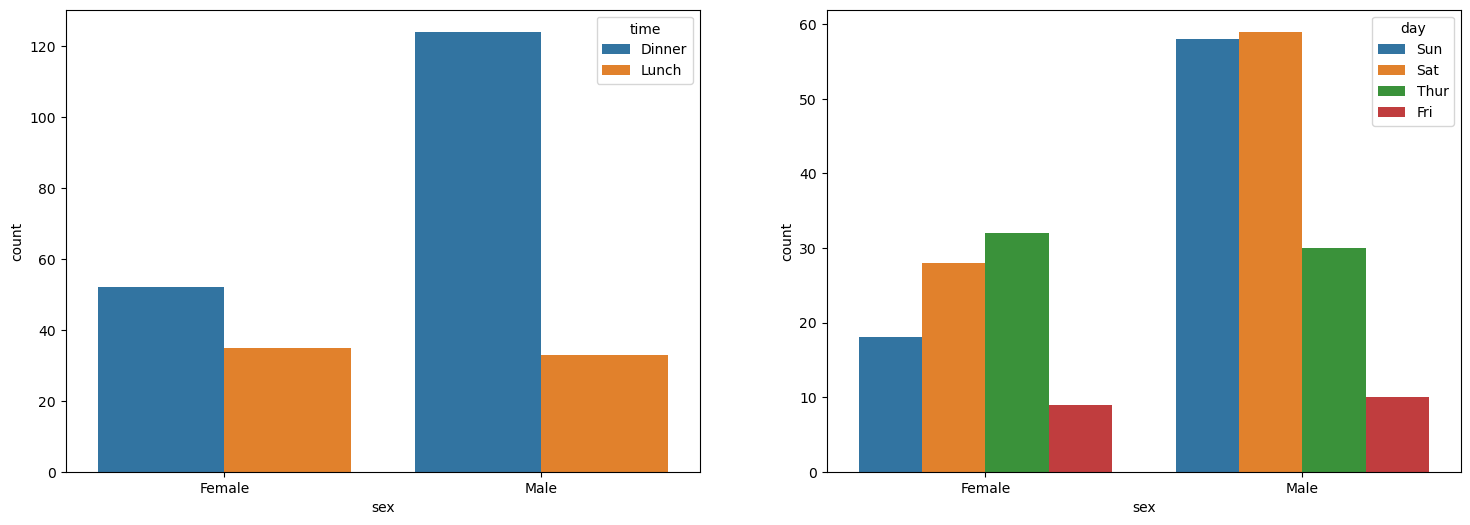

In [26]:
fig ,ax =plt.subplots(1,2, figsize=(18,6))
sns.countplot(x="sex",hue="time",data=data, ax=ax[0])
sns.countplot(x="sex",hue="day",data=data, ax=ax[1]);

<AxesSubplot:xlabel='size', ylabel='tip'>

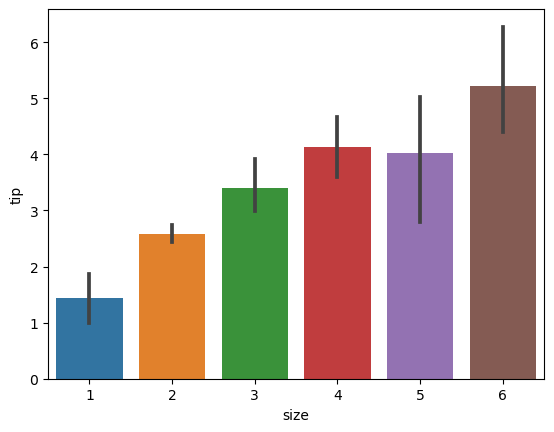

In [27]:
sns.barplot(x= data["size"], y= data["tip"])

<AxesSubplot:xlabel='size', ylabel='total_bill'>

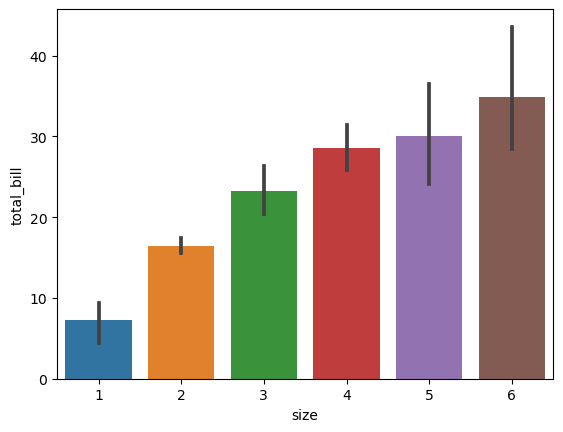

In [28]:
sns.barplot(x= data["size"], y= data["total_bill"])

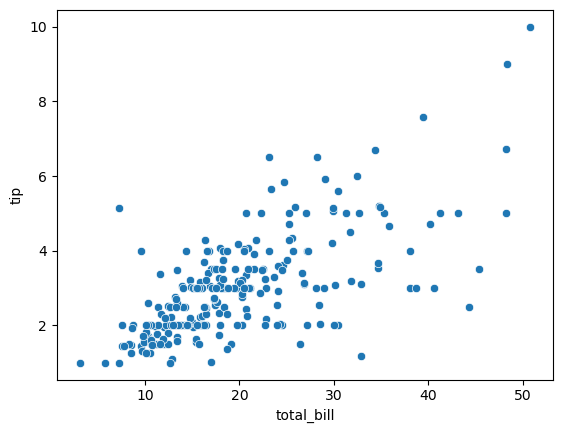

In [29]:
sns.scatterplot(x= data["total_bill"], y= data["tip"]);

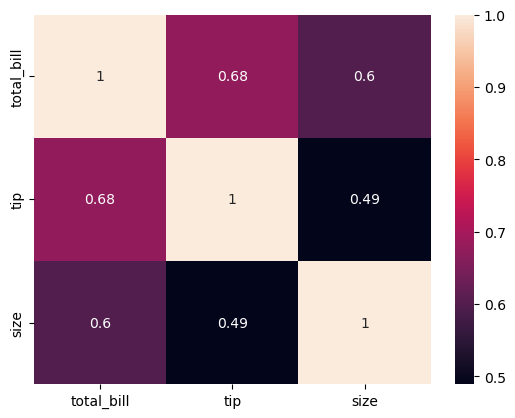

In [30]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix,annot=True);

*******

## Key Conclusions from Data Analysis:

- **Gender and Tipping Behavior:** Male and female customers exhibit similar behavior, except that male customers are more likely to be high tippers.

- **Tipping and Meal Time:** High tippers are more likely to be present during dinner service.

- **Effect of Smoking Customers:** The presence of a smoking customer does not significantly impact the tip amount.

- **Tip Policy Recommendation:** Based on our analysis, it's advisable to consider a tip range of (1 to 10) dollars, with an average tip amount of approximately 3 dollars.

- **Gender and Dining Timing:** Male customers exhibit a preference for dining during the early part of the week.

- **Customized Menu Consideration:** The analysis suggests that our restaurant's customer groups predominantly consist of dining (dinner) companions. This highlights the need to explore and create a customized menu that aligns with our customers' preferences.

- **Total Bill and Table Size Influence:** Both the total bill amount and the number of customers per table have a positive impact on the tip amount. However, it's important to emphasize that the total bill amount has a more substantial influence, resulting in higher tip amounts.


- **Total Bill Analysis:** The mean total bill amount is approximately $19.79, with a standard deviation of around $8.90. Notably, the highest observed bill is $50.81, indicating a diverse customer base with varying spending habits.

- **Tip Amount Analysis:** The mean tip amount is roughly $3.00, with a maximum tip of $10.00 and a 75th percentile value of $3.56. This suggests a noticeable gap between average tippers and more generous tippers, highlighting the variance in tipping behavior among customers.

- **Table Size Median:** The median number of customers per table is 2.00. This observation may warrant further investigation to understand the prevalence of couples and highlights the need for a tailored offering designed for pairs to attract and accommodate this particular customer segment effectively.

*******

## Key consideration about our data
- We assumed in our process that our data set is representative of the whole populatio of our customer base in the restureant.
- We ignored some limitations that exsists in our data including missing categories like some days of the week("Monday", "tuesday" and "wednesday") and assumed that our resturant does not offer break fast on the menue.


*******

## Feature Engineering

*******

# **Modeling**